## STEP 02: DATA PREPROCESSING 

### 1) Load the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [2]:
data = pd.read_excel("dataset/dim_reduct_v1.xlsx")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


### 2) Calculate the variables distances

In [3]:
# Compute correlation matrix
corr_matrix = data.corr().values

# Convert correlation to distance: distance = 1 - |correlation|
distance_matrix = 1 - np.abs(corr_matrix)

# Make sure it's a valid condensed distance matrix
distance_matrix = np.nan_to_num(distance_matrix)  # Handle NaN if any

In [4]:
distance_matrix

array([[0.        , 0.44176229, 0.78444396, ..., 0.99689007, 0.96375043,
        0.93811592],
       [0.44176229, 0.        , 0.91347969, ..., 0.8709086 , 0.81326087,
        0.8788283 ],
       [0.78444396, 0.91347969, 0.        , ..., 0.8319527 , 0.78699514,
        0.8820569 ],
       ...,
       [0.99689007, 0.8709086 , 0.8319527 , ..., 0.        , 0.74351926,
        0.62775743],
       [0.96375043, 0.81326087, 0.78699514, ..., 0.74351926, 0.        ,
        0.71739251],
       [0.93811592, 0.8788283 , 0.8820569 , ..., 0.62775743, 0.71739251,
        0.        ]])

In [5]:
# Perform hierarchical clustering
Z = linkage(squareform(distance_matrix), method='average')  # 'average', 'complete', 'ward'

### 3) Hierarchical Clustering Visualization: Dendogram

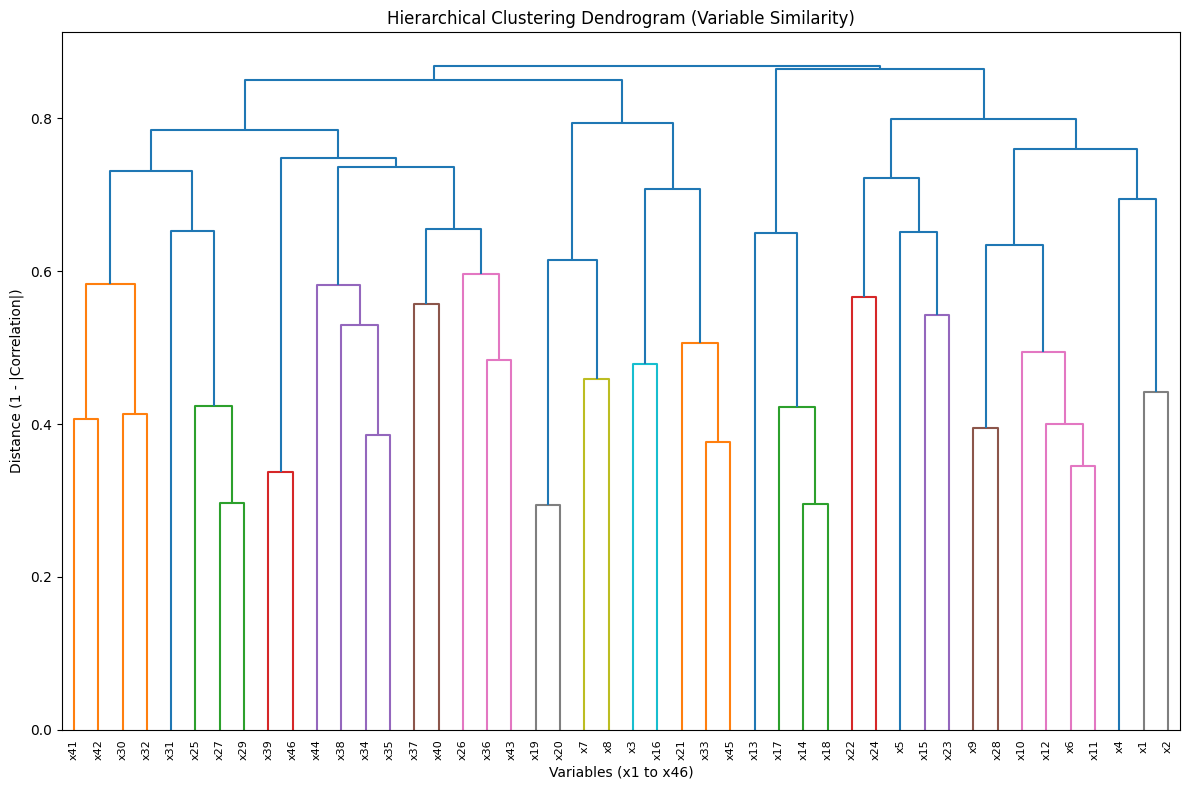

In [6]:
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Variable Similarity)")
plt.xlabel("Variables (x1 to x46)")
plt.ylabel("Distance (1 - |Correlation|)")
plt.tight_layout()
plt.show()

Strategy of grouping variables by similarity

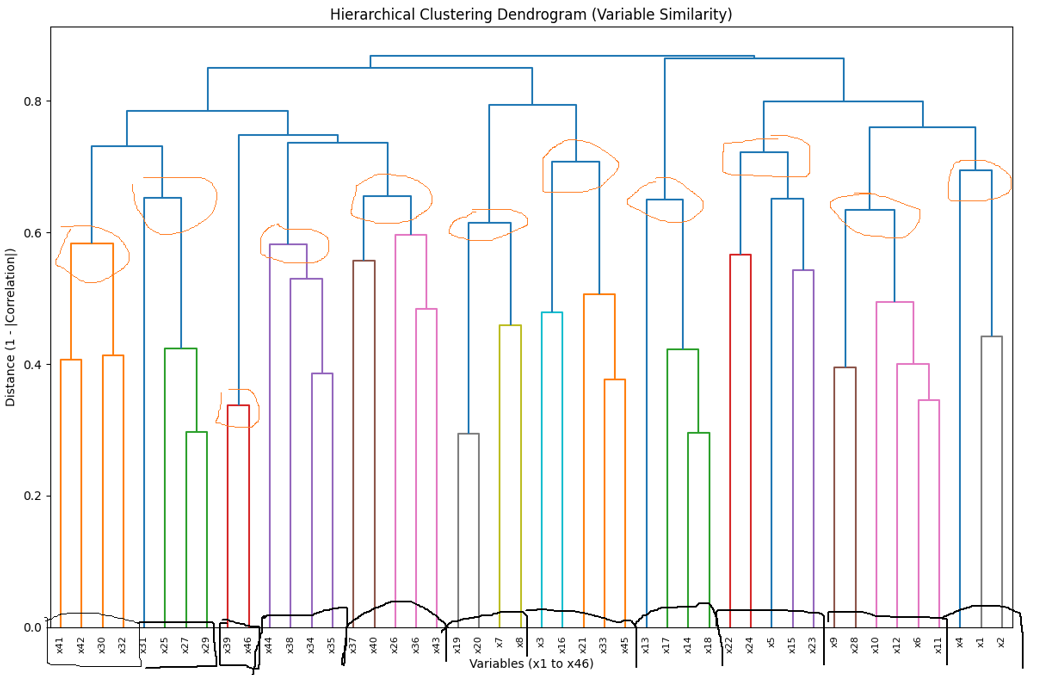

### 4) Dimensionality Reduction through AutoEncoders

In [7]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


In [8]:
data.shape

(40, 46)

### Autoencoder model

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.callbacks import LambdaCallback

In [43]:
def autoencoder_compressor(data, input_dim, output_dim):
    # Architecture with intermediate layer and LeakyReLU
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(2)(input_layer)  # Intermediate layer
    encoded = LeakyReLU(negative_slope=0.1)(encoded)  # Avoid dead neurons
    encoded = Dense(output_dim, activation='linear')(encoded)  # Final bottleneck
    
    # Decoder
    decoded = Dense(input_dim, activation='linear')(encoded)
    
    # Model
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}") 
        if (epoch + 1) % 25 == 0 else None)
    
    autoencoder.fit(data, data, epochs = 500, batch_size = 5, verbose = 0, callbacks = [callback])
    
    # Encoder (for dimensionality reduction)
    encoder = Model(input_layer, encoded)
    result = encoder.predict(data)
    return result

#### Dimensionality reduction using hierarchical clusters

In [44]:
subgroups = {
    "group01": ["x41", "x42", "x30", "x32"],
    "group02": ["x31", "x25", "x27", "x29"],
    "group03": ["x39", "x46"],
    "group04": ["x44", "x38", "x34", "x35"],
    "group05": ["x37","x40", "x26", "x36", "x43"],
    "group06": ["x19", "x20", "x7", "x8"],
    "group07": ["x3", "x16", "x21", "x33", "x45"],
    "group08": ["x13", "x17", "x14", "x18"],
    "group09": ["x22", "x24","x5", "x15", "x23"],
    "group10": ["x9", "x28", "x10", "x12", "x6", "x11"],
    "group11": ["x4", "x1", "x2"]
}

In [45]:
subgroups.items()

dict_items([('group01', ['x41', 'x42', 'x30', 'x32']), ('group02', ['x31', 'x25', 'x27', 'x29']), ('group03', ['x39', 'x46']), ('group04', ['x44', 'x38', 'x34', 'x35']), ('group05', ['x37', 'x40', 'x26', 'x36', 'x43']), ('group06', ['x19', 'x20', 'x7', 'x8']), ('group07', ['x3', 'x16', 'x21', 'x33', 'x45']), ('group08', ['x13', 'x17', 'x14', 'x18']), ('group09', ['x22', 'x24', 'x5', 'x15', 'x23']), ('group10', ['x9', 'x28', 'x10', 'x12', 'x6', 'x11']), ('group11', ['x4', 'x1', 'x2'])])

In [46]:
data[subgroups["group01"]].head()

,x41,x42,x30,x32
0,-3.574463,-3.972343,-5.075038,-7.999031
1,-7.573024,-7.974543,-1.072523,-9.998484
2,2.426235,-5.974534,-7.074185,0.000340
3,-7.574656,6.024878,-11.074297,2.000313
4,-7.573840,-1.974245,8.926775,0.000652


In [47]:
data[subgroups["group01"]].shape

(40, 4)

In [48]:
def compression_data(data, subgroups):
    data_compressed = np.empty((data.shape[0], 0))
    for key, val in subgroups.items():
        aux = []
        aux = autoencoder_compressor(data = data[val], input_dim = len(val), output_dim = 1)
        aux = np.array(aux).reshape(-1, 1)        
        data_compressed = np.hstack([data_compressed, aux])
        print("The " + key + " compression is done ...")
    return data_compressed

In [49]:
final_table = compression_data(data, subgroups)

Epoch 25: loss = 55.4502
Epoch 50: loss = 52.3889
Epoch 75: loss = 50.3891
Epoch 100: loss = 49.0303
Epoch 125: loss = 48.0525
Epoch 150: loss = 47.3027
Epoch 175: loss = 46.6858
Epoch 200: loss = 46.1562
Epoch 225: loss = 45.7022
Epoch 250: loss = 45.3087
Epoch 275: loss = 44.9678
Epoch 300: loss = 44.6767
Epoch 325: loss = 44.4270
Epoch 350: loss = 44.2048
Epoch 375: loss = 44.0168
Epoch 400: loss = 43.8614
Epoch 425: loss = 43.6956
Epoch 450: loss = 43.5451
Epoch 475: loss = 43.4320
Epoch 500: loss = 43.3321
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
The group01 compression is done ...
Epoch 25: loss = 136.0702
Epoch 50: loss = 131.0310
Epoch 75: loss = 120.4698
Epoch 100: loss = 101.5912
Epoch 125: loss = 81.1645
Epoch 150: loss = 66.2574
Epoch 175: loss = 59.7751
Epoch 200: loss = 57.2576
Epoch 225: loss = 56.1997
Epoch 250: loss = 55.5102
Epoch 275: loss = 55.0506
Epoch 300: loss = 54.6898
Epoch 325: loss = 54.3739
Epoch 350: loss = 54.1644
Epoch 375: loss = 53.9589
Epoch 400: loss =

In [50]:
final_table

array([[-2.91265059e+00, -5.32155342e+01, -4.03041267e+00,
         4.30759907e+00, -6.89037466e+00, -1.48930922e+01,
         8.81944180e+00, -7.71198130e+00,  3.22506213e+00,
         2.61671734e+01,  5.58391809e-01],
       [-3.12978935e+00,  4.00841370e+01, -4.23839426e+00,
         6.18829441e+00, -1.70120373e+01, -1.09145746e+01,
         1.23706608e+01, -8.12566757e+00,  3.36378551e+00,
         9.61881995e-01, -4.18417454e-02],
       [-2.44896603e+00,  2.81661510e+01, -4.37238979e+00,
        -4.44633055e+00, -6.56014109e+00,  3.49641013e+00,
         1.08874054e+01,  1.95349903e+01,  2.25880885e+00,
        -1.65591984e+01, -4.65218811e+01],
       [-2.84255290e+00,  2.77781029e+01, -4.02329302e+00,
        -7.02234936e+00,  3.28589463e+00, -3.89289021e+00,
         1.96012230e+01, -1.24370909e+01,  3.87729502e+00,
         1.34912167e+01, -6.35067940e+00],
       [-2.01573277e+00,  1.70668259e+01, -5.33812666e+00,
         5.86528921e+00, -4.93977642e+00, -9.80422115e+00,
  

In [51]:
# convert to pandas dataframe
frame_dataset = pd.DataFrame(final_table)

In [52]:
frame_dataset.columns = ["x1*", "x2*", "x3*", "x4*", "x5*", 
                         "x6*", "x7*", "x8*", "x9*", "x10*", "x11*"]

In [53]:
frame_dataset.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
0,-2.912651,-53.215534,-4.030413,4.307599,-6.890375,-14.893092,8.819442,-7.711981,3.225062,26.167173,0.558392
1,-3.129789,40.084137,-4.238394,6.188294,-17.012037,-10.914575,12.370661,-8.125668,3.363786,0.961882,-0.041842
2,-2.448966,28.166151,-4.372390,-4.446331,-6.560141,3.496410,10.887405,19.534990,2.258809,-16.559198,-46.521881
3,-2.842553,27.778103,-4.023293,-7.022349,3.285895,-3.892890,19.601223,-12.437091,3.877295,13.491217,-6.350679
4,-2.015733,17.066826,-5.338127,5.865289,-4.939776,-9.804221,7.409998,-12.161316,2.748820,-3.558533,0.300328


In [54]:
print("Final dimensionality: ", frame_dataset.shape)

Final dimensionality:  (40, 11)


In [56]:
# save dataframe as excel file
frame_dataset.to_excel("dataset/compressed_to_11d.xlsx", index = False)

--------------------------- 

## STEP 03: MACHINE LEARNING TASK

#### 3.1) Data preparing

In [26]:
dataset2 = pd.read_excel("dataset/original_health_data.xlsx")
dataset2.head()

,Unnamed: 0,28,29,30,31,32,33,34,35,36,...,113,114,115,116,117,118,119,Kerdo,Starr,Robinson
0,patient 1,1.10,74,1.26,80,0.68,80,0.70,87,0.60,...,78,0.90,82,0.60,80,0.96,78,18.9,75.04,74.0
1,patient 2,1.10,76,1.30,76,1.00,78,1.30,82,1.20,...,70,0.90,70,0.66,80,0.80,80,-2.9,58.20,78.2
2,patient 3,0.48,78,0.38,80,0.60,82,0.16,28,0.49,...,80,0.90,60,0.95,80,0.85,76,-6.1,67.91,79.2
3,patient 4,1.40,70,1.23,70,0.84,80,1.50,74,1.30,...,60,0.96,68,1.00,88,0.85,70,3.2,57.52,68.2
4,patient 5,1.10,74,0.54,80,2.10,76,0.70,84,1.30,...,80,0.66,74,0.80,80,0.80,80,-20.7,58.36,63.8


In [27]:
index_predictors = dataset2.loc[:, ["Kerdo", "Starr", "Robinson"]]
index_predictors.head()

,Kerdo,Starr,Robinson
0,18.9,75.04,74.0
1,-2.9,58.20,78.2
2,-6.1,67.91,79.2
3,3.2,57.52,68.2
4,-20.7,58.36,63.8


In [28]:
data_indexes = pd.concat([frame_dataset, index_predictors], axis = 1)
data_indexes.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*,Kerdo,Starr,Robinson
0,-0.192214,2.424111,-0.108091,0.817047,2.920505,0.506010,-1.348114,-1.671101,1.392244,2.186853,3.458366,18.9,75.04,74.0
1,-0.539226,-3.262925,0.069325,12.004340,0.323579,-0.516412,0.430348,-0.769260,-0.322731,-0.620141,2.948385,-2.9,58.20,78.2
2,-0.166963,0.023664,-0.703562,-12.017380,-0.099914,-13.659134,0.246466,0.421317,1.767455,-10.495476,-2.384311,-6.1,67.91,79.2
3,-0.894014,0.761944,-1.445125,-11.556447,-0.781261,0.308296,0.505436,-0.341064,-1.218969,1.651423,0.507376,3.2,57.52,68.2
4,-0.686548,-3.730707,-0.766041,7.526512,2.398296,0.677499,0.168496,0.035637,-0.292425,-5.062153,2.052716,-20.7,58.36,63.8


In [29]:
data_indexes.columns

Index(['x1*', 'x2*', 'x3*', 'x4*', 'x5*', 'x6*', 'x7*', 'x8*', 'x9*', 'x10*',
       'x11*', 'Kerdo', 'Starr', 'Robinson'],
      dtype='object')

#### 3.2) Data Exploring

In [30]:
import seaborn as sbn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [31]:
def hist_frequencies(data, bins):
    # calculate the nrows and ncols for plots
    numeric_cols = data.columns
    ncol_plots = 3
    nrow_plots = (len(numeric_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()    
    
    for i, col in enumerate(numeric_cols):
        sbn.histplot(data[col], color = "blue", bins = bins, ax = axs[i])
        axs[i].set_title("Histogram of frequencies for " + col)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

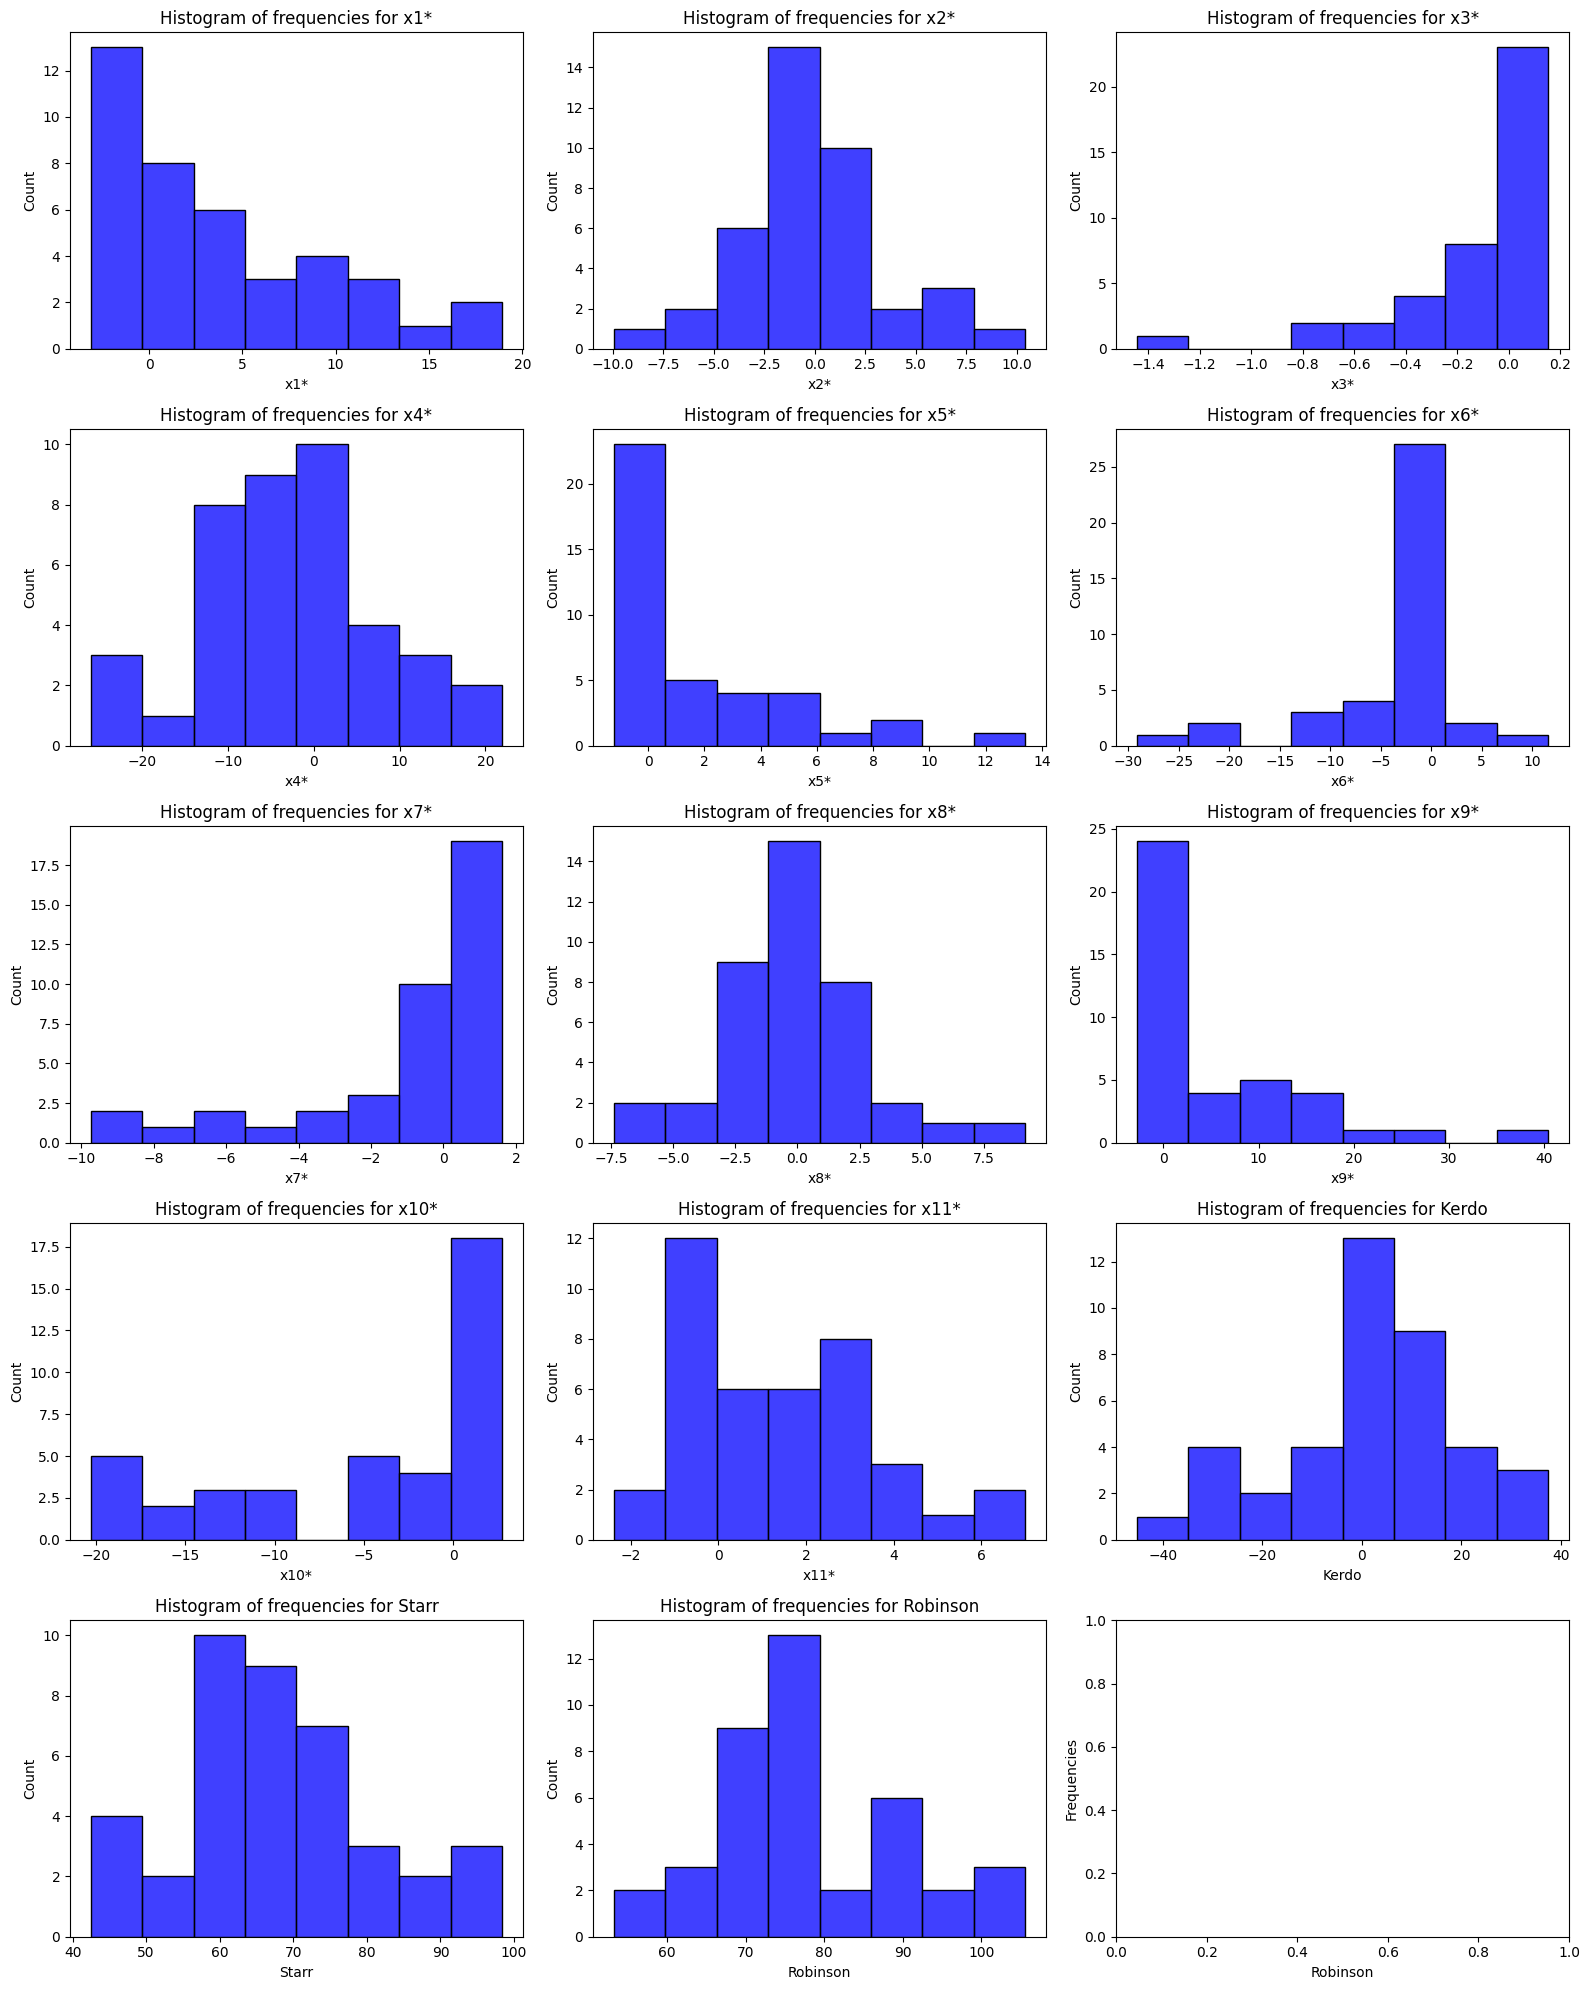

In [32]:
hist_frequencies(data_indexes, bins = 8)

### 3.3) Data Processing for Kerdo Index

Split X and Y

In [34]:
X = frame_dataset
y_kerdo = data_indexes.loc[:, ["Kerdo"]]
y_starr = data_indexes.loc[:, ["Starr"]]
y_robinson = data_indexes.loc[:, ["Robinson"]]

In [36]:
print("Dim-X: ", X.shape)
print("Dim y-kerdo: ", y_kerdo.shape)
print("Dim y-starr: ", y_starr.shape)
print("Dim y-robinson: ", y_robinson.shape)

Dim-X:  (40, 11)
Dim y-kerdo:  (40, 1)
Dim y-starr:  (40, 1)
Dim y-robinson:  (40, 1)


Split train and test set

In [37]:
# split train and test set
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y_kerdo, test_size = 10, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (30, 11)
Y-train:  30
X-test dim:  (10, 11)
Y-test:  10


In [38]:
x_train

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
27,7.414979,1.588128,0.029804,-4.480184,5.131395,-0.209254,-0.416368,3.245220,2.645452,1.241856,3.954770
35,5.547750,2.285071,0.121747,-18.988949,5.528637,0.530609,0.306651,-2.831855,-0.420870,-13.692257,-0.353431
37,17.806440,7.521043,0.008926,-9.185995,0.482003,-19.462078,0.854741,2.633278,0.616637,-16.411678,-0.309649
2,-0.166963,0.023664,-0.703562,-12.017380,-0.099914,-13.659134,0.246466,0.421317,1.767455,-10.495476,-2.384311
39,2.972723,3.257457,0.015169,-5.305194,-0.567405,1.301501,-0.100241,-3.354663,16.861984,2.622951,3.310769
30,2.042211,0.026720,0.008915,-3.178918,-0.382831,-5.763065,0.390871,-1.830053,25.688446,2.119019,-0.199529
34,11.464223,-2.089916,0.103968,-9.861928,6.209748,-8.120105,1.625337,1.357120,0.025983,0.395695,2.309151
16,13.274549,-1.756239,0.155108,-4.888336,5.028901,-3.603467,1.463994,-0.623034,-1.140004,2.030478,3.265001
36,3.898539,0.198452,0.015167,1.092365,-0.277521,-0.379260,-2.312872,-0.270498,10.349199,1.281042,-0.335278
8,-1.134820,-2.750541,-0.348313,-1.137693,-0.187609,-11.913951,-5.650253,1.376473,10.924035,-1.889161,-1.265615


In [39]:
x_test

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
22,5.901924,-0.195365,-0.400884,14.615565,13.415121,-4.695574,-2.927400,-2.326213,-0.472517,0.448913,-0.172535
20,0.178021,-9.950248,0.029792,-3.575208,0.286335,-29.148682,0.942665,1.460348,16.136854,-20.294275,2.978642
25,-2.145658,5.524958,-0.139484,1.540256,9.195578,0.786343,0.487403,-1.036755,12.901980,0.753783,-0.621763
4,-0.686548,-3.730707,-0.766041,7.526512,2.398296,0.677499,0.168496,0.035637,-0.292425,-5.062153,2.052716
10,2.262294,0.205692,-0.369660,-1.324975,3.570521,0.651003,-7.732244,2.003217,1.589165,-4.835591,3.562279
15,0.158945,-0.003169,0.056938,-2.956060,-0.497255,0.010688,0.210162,1.442491,-1.410805,-14.407010,1.567730
28,15.511891,-3.010318,-0.358102,10.819822,0.020572,3.332184,0.648293,0.518265,0.182405,0.958825,0.955640
11,9.970789,-0.816904,0.008919,-6.909851,0.006012,0.654340,1.449188,9.158465,-1.653217,-19.599815,5.132663
18,-0.539190,-0.238261,0.029806,0.331534,0.204372,0.657373,0.363314,-0.117754,18.773121,-9.845118,0.379555
29,-0.160327,-5.142115,0.012032,0.332227,-0.107924,11.596066,0.096774,-1.259474,-0.473426,-0.986109,0.879356


In [40]:
var = data_indexes.columns.to_list()

In [41]:
var[:-3]

['x1*', 'x2*', 'x3*', 'x4*', 'x5*', 'x6*', 'x7*', 'x8*', 'x9*', 'x10*', 'x11*']

In [42]:
scaler = StandardScaler()

In [43]:
# execute preprocessor in train/test
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [44]:
y_test

,Kerdo
22,37.5
20,14.6
25,-1.6
4,-20.7
10,5.4
15,-12.9
28,10.7
11,7.9
18,-29.0
29,-34.6


### 4. ML: Build Model

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
model1 = GridSearchCV(
    Lasso(max_iter=100),
    {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    cv=5
)

In [48]:
model1.fit(X_train_scaled, y_train) 
best_model = model1.best_estimator_

In [49]:
y_pred = best_model.predict(x_test)

d:\POLYTECH_2025\health_index\hi_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [50]:
print(y_pred)

[ 75.37465767 -10.6332334  172.50887664  28.47827351  29.66999111
   0.94351751 -94.47916437 -54.36562112 100.86932566  18.8385356 ]


In [51]:
import pickle

# function to save model
def save_model(filename, model):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

In [52]:
# function to load model
def load_model(filename):
    with open(filename, "rb") as file:
        return pickle.load(file)

In [174]:
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [200, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

In [175]:
def LassoModel(x_train, y_train, params):
    # define the model    
    model = Lasso()
    
    # hyperparameter optimization
    grid_search = GridSearchCV(estimator = model,
                               param_grid = params,
                               scoring = "neg_mean_squared_error",
                               cv = 5,
                               n_jobs = -1
                            )
    grid_search.fit(x_train, y_train)
    
    # get best model
    best_model = grid_search.best_estimator_
    print(grid_search.best_params_)
    
    return best_model

In [176]:
lasso_kerdo = LassoModel(x_train, y_train, lasso_params)

{'alpha': 10, 'max_iter': 200, 'selection': 'cyclic', 'tol': 0.0001}


In [177]:
save_model("models/kerdo_idx1.pkl", lasso_kerdo)

### 5. Evaluate Model

In [178]:
rec_lasso_idx1 = load_model("models/kerdo_idx1.pkl")

In [53]:
def eval_model_perform(model, x, y):
    y_pred = model.predict(x)
    print(y)
    print(y_pred)
    rmse_val = np.sqrt(mean_squared_error(y, y_pred))
    r2_val = r2_score(y, y_pred)

    return rmse_val, r2_val

In [54]:
# r2-score for train set
rmse_lasso_train_idx1, r2_lasso_train_idx1 = eval_model_perform(model1, x_train, y_train)
print(f"R-MSE train score: {rmse_lasso_train_idx1:.3f}")
print(f"R^2 train score: {r2_lasso_train_idx1:.3f}")

    Kerdo
27   26.1
35   16.7
37  -21.0
2    -6.1
39    1.5
30   14.3
34   23.1
16  -45.2
36    0.0
8    14.3
13   12.5
5     6.3
17   -1.6
14    1.8
33   -1.4
7   -25.0
32   28.6
1    -2.9
26   -9.4
12   23.6
31  -25.0
24    9.0
6     3.2
23    9.1
21   -5.3
19    0.0
9    31.3
38    6.3
3     3.2
0    18.9
[   7.93003782   12.69294079 -136.88130874  -19.43960287   44.67613278
   77.66803998  -54.20085599  -73.26898313   19.15601212   26.43220088
   39.28277443   20.53449591    0.30240081  -23.8261834   -25.58466473
 -130.42074266  -45.93901495    2.67502868   17.59499732  155.76994966
  -58.57020106   34.55753023   70.79069587  106.69479557  -26.8063958
    1.75609892   58.38914809    6.53236879  -11.26234387   33.34876353]
R-MSE train score: 52.174
R^2 train score: -8.541


d:\POLYTECH_2025\health_index\hi_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [56]:
# r2-score for test set
rmse_lasso_test_idx1, r2_lasso_test_idx1 = eval_model_perform(model1, x_test, y_test)
print(f"R-MSE test score: {rmse_lasso_test_idx1:.3f}")
print(f"R^2 test score: {r2_lasso_test_idx1:.3f}")

    Kerdo
22   37.5
20   14.6
25   -1.6
4   -20.7
10    5.4
15  -12.9
28   10.7
11    7.9
18  -29.0
29  -34.6
[ 75.37465767 -10.6332334  172.50887664  28.47827351  29.66999111
   0.94351751 -94.47916437 -54.36562112 100.86932566  18.8385356 ]
R-MSE test score: 83.813
R^2 test score: -14.930


d:\POLYTECH_2025\health_index\hi_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
